# House Prices - Advanced Regression Techniques
Dataset to predict SalePrice based on 79 features

# Importing libraries and data

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [2]:
TRAIN_DATA_PATH = "./inputs/train.csv"
TEST_DATA_PATH = "./inputs/test.csv"
SUBMISSION_PATH = "./outputs/submission.csv"

In [3]:
train_df = pd.read_csv(TRAIN_DATA_PATH)
test_df = pd.read_csv(TEST_DATA_PATH)
print(train_df.shape, test_df.shape)
print("Target Column: ", set(train_df.columns) - set(test_df.columns))

(1460, 81) (1459, 80)
Target Column:  {'SalePrice'}


# Identifying required transformations

## Missing values

### Null count
0. All nulls are identified by pd.isnull()
1. Target variable with no null values in train_df
2. Features ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"] with too many missing values, drop them
3. Investigate fill strategy for LotFrontage
4. Investigate fill strategy for features that Starts With "Garage"
5. Investigate fill strategy for features that Starts With "Bsmt"
6. Investigate fill strategy for features that Starts With "MasVnr"
7. Investigate fill strategy for the following features
['Electrical','MSZoning', 'Utilities', 'Functional', 'KitchenQual', 'TotalBsmtSF', 'Exterior2nd',  'Exterior1st', 'SaleType']
8. Further investigate fill strategy for the following features (seem to be redundant with
['BsmtHalfBath', 'BsmtFullBath','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'
'GarageCars','GarageArea']


In [4]:
train_df.isnull().sum().sort_values(ascending=False).head(30)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
TotRmsAbvGrd       0
GarageCars         0
dtype: int64

In [5]:
test_df.isnull().sum().sort_values(ascending=False).head(40)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
MiscVal            0
BedroomAbvGr       0
KitchenAbvGr       0
YrSold             0
TotRmsAbvGrd       0
MoSold             0
Fireplaces         0
dtype: int64

In [6]:
nullcount_test = test_df.isnull().sum().sort_values(ascending=False)
mask = (nullcount_test > 0 ) & (nullcount_test < 15) 
print(nullcount_test[mask].index)

Index(['MSZoning', 'BsmtHalfBath', 'Utilities', 'Functional', 'BsmtFullBath',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'KitchenQual', 'TotalBsmtSF',
       'Exterior2nd', 'GarageCars', 'Exterior1st', 'GarageArea', 'SaleType'],
      dtype='object')


In [7]:
def count_missing_values(dataframe):
    null_mask = ((dataframe.isnull()) | (dataframe == 'NA') | (dataframe == 'None') | (dataframe == None) | (dataframe == '') | (dataframe == '-'))
    return null_mask.sum().sort_values(ascending=False)

In [8]:
count_missing_values(train_df).head(40)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
dtype: int64

In [9]:
count_missing_values(test_df).head(40)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
MiscVal            0
BedroomAbvGr       0
KitchenAbvGr       0
YrSold             0
TotRmsAbvGrd       0
MoSold             0
Fireplaces         0
dtype: int64

### LotFrontage investigation
- Create artificial feature LogLotFrontage
- Fill nulls of LogLotFrontage with mean, as it is close to a normal distribution. Use `fill_null_dict_log_lot_frontage`
- Drop original LotFrontage feature

<Axes: >

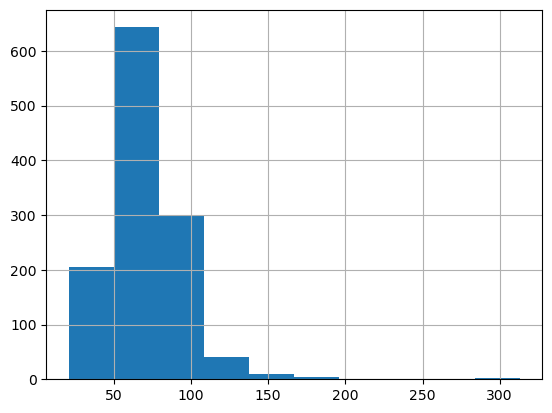

In [10]:
train_df["LotFrontage"].hist()

<Axes: >

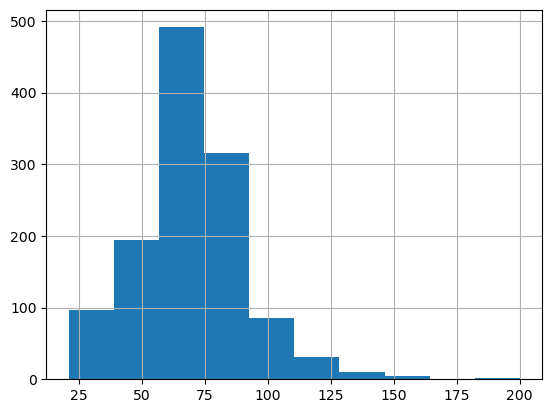

In [11]:
test_df["LotFrontage"].hist()

<Axes: >

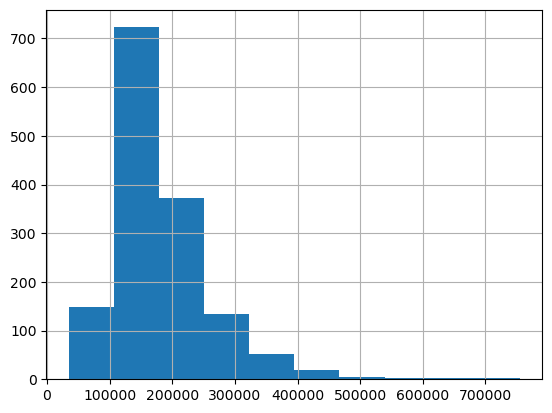

In [12]:
train_df["SalePrice"].hist()

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

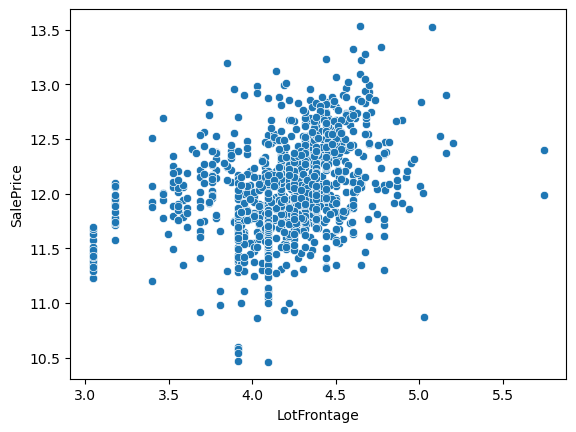

In [13]:
sns.scatterplot(x=np.log(train_df["LotFrontage"]), y=np.log(train_df["SalePrice"]))

<Axes: >

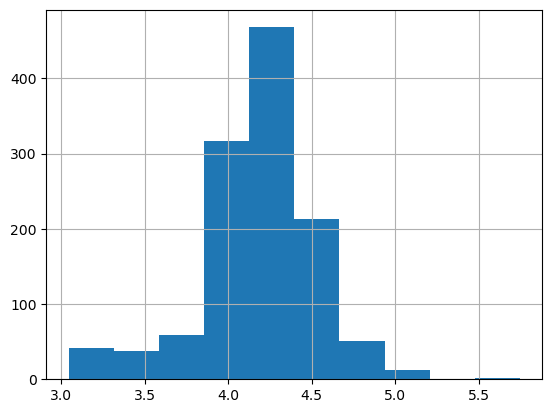

In [14]:
np.log(train_df["LotFrontage"]).hist()

In [15]:
fill_null_dict_log_lot_frontage = {"LogLotFrontage": np.log(train_df["LotFrontage"]).mean()}
fill_null_dict_log_lot_frontage

{'LogLotFrontage': 4.1910486102654865}

### Starts with Garage investigation
- Fill with string "NA" the categorical columns ["GarageType","GarageFinish","GarageQual","GarageCond"] by using the dictionary `fill_null_dict_garage`
- Fill with median values for "Detchd" test dataframe missing values from "GarageCars" and "GarageArea" columns by using the dictionary `fill_null_dict_garage_numerical`
- Fill with zero column "GarageYrBlt" as its nan values represent houses without garage

In [16]:
garage_columns_mask = train_df.columns.str.startswith("Garage")
train_df.iloc[:,garage_columns_mask].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageType    1379 non-null   object 
 1   GarageYrBlt   1379 non-null   float64
 2   GarageFinish  1379 non-null   object 
 3   GarageCars    1460 non-null   int64  
 4   GarageArea    1460 non-null   int64  
 5   GarageQual    1379 non-null   object 
 6   GarageCond    1379 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 80.0+ KB


In [17]:
# Categorical columns
[(column, train_df[column].value_counts(dropna=False).sort_values(ascending=False)) for column in ["GarageType","GarageFinish","GarageQual","GarageCond"]]

[('GarageType',
  Attchd     870
  Detchd     387
  BuiltIn     88
  NaN         81
  Basment     19
  CarPort      9
  2Types       6
  Name: GarageType, dtype: int64),
 ('GarageFinish',
  Unf    605
  RFn    422
  Fin    352
  NaN     81
  Name: GarageFinish, dtype: int64),
 ('GarageQual',
  TA     1311
  NaN      81
  Fa       48
  Gd       14
  Ex        3
  Po        3
  Name: GarageQual, dtype: int64),
 ('GarageCond',
  TA     1326
  NaN      81
  Fa       35
  Gd        9
  Po        7
  Ex        2
  Name: GarageCond, dtype: int64)]

In [18]:
[(column, test_df[column].value_counts(dropna=False).sort_values(ascending=False)) for column in ["GarageType","GarageFinish","GarageQual","GarageCond"]]

[('GarageType',
  Attchd     853
  Detchd     392
  BuiltIn     98
  NaN         76
  Basment     17
  2Types      17
  CarPort      6
  Name: GarageType, dtype: int64),
 ('GarageFinish',
  Unf    625
  RFn    389
  Fin    367
  NaN     78
  Name: GarageFinish, dtype: int64),
 ('GarageQual',
  TA     1293
  NaN      78
  Fa       76
  Gd       10
  Po        2
  Name: GarageQual, dtype: int64),
 ('GarageCond',
  TA     1328
  NaN      78
  Fa       39
  Po        7
  Gd        6
  Ex        1
  Name: GarageCond, dtype: int64)]

In [19]:
fill_null_dict_garage = dict([(column, "NA") for column in ["GarageType","GarageFinish","GarageQual","GarageCond"]])
fill_null_dict_garage

{'GarageType': 'NA',
 'GarageFinish': 'NA',
 'GarageQual': 'NA',
 'GarageCond': 'NA'}

array([[<Axes: title={'center': 'GarageYrBlt'}>,
        <Axes: title={'center': 'GarageArea'}>],
       [<Axes: title={'center': 'GarageCars'}>, <Axes: >]], dtype=object)

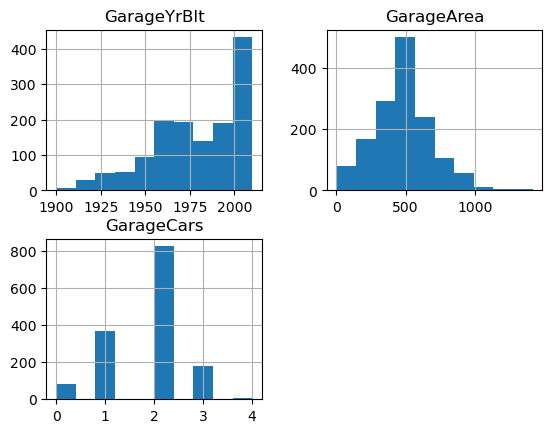

In [20]:
train_df[["GarageYrBlt","GarageArea","GarageCars"]].hist()

In [21]:
# Unique missing value is one row from test dataframe -> we can probably drop it or fill with median values grouped by "Detchd" "GarageType"
test_df.loc[test_df["GarageCars"].isnull(),test_df.columns.str.startswith("Garage")]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
1116,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
fill_null_dict_garage_numerical = dict(train_df.loc[train_df["GarageType"] == "Detchd", ["GarageArea","GarageCars"]].median())
fill_null_dict_garage_numerical

{'GarageArea': 400.0, 'GarageCars': 2.0}

In [23]:
test_df.loc[test_df["GarageYrBlt"].isnull(),test_df.columns.str.startswith("Garage")]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
53,NaN,NaN,NaN,0.0,0.0,NaN,NaN
71,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,NaN,0.0,0.0,NaN,NaN
92,NaN,NaN,NaN,0.0,0.0,NaN,NaN
96,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
1433,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1449,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1453,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1454,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [24]:
train_df.loc[train_df["GarageYrBlt"].isnull(),train_df.columns.str.startswith("Garage")]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,0,0,NaN,NaN
1407,NaN,NaN,NaN,0,0,NaN,NaN
1449,NaN,NaN,NaN,0,0,NaN,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN


### Starts with Bsmt investigation
- Fill nulls with zeros on test dataframe on columns ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","BsmtFullBath","BsmtHalfBath"]
- Fill nullls with 'NA' for the categorical columns ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]
- All these values and columns can be accessed through `fill_null_dict_bsmt` dictionary

In [25]:
train_bsmt_mask = train_df.columns.str.startswith("Bsmt")
train_df.loc[:,train_bsmt_mask].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1423 non-null   object
 1   BsmtCond      1423 non-null   object
 2   BsmtExposure  1422 non-null   object
 3   BsmtFinType1  1423 non-null   object
 4   BsmtFinSF1    1460 non-null   int64 
 5   BsmtFinType2  1422 non-null   object
 6   BsmtFinSF2    1460 non-null   int64 
 7   BsmtUnfSF     1460 non-null   int64 
 8   BsmtFullBath  1460 non-null   int64 
 9   BsmtHalfBath  1460 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 114.2+ KB


In [26]:
test_bsmt_mask = test_df.columns.str.startswith("Bsmt")
test_df.loc[:,test_bsmt_mask].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtQual      1415 non-null   object 
 1   BsmtCond      1414 non-null   object 
 2   BsmtExposure  1415 non-null   object 
 3   BsmtFinType1  1417 non-null   object 
 4   BsmtFinSF1    1458 non-null   float64
 5   BsmtFinType2  1417 non-null   object 
 6   BsmtFinSF2    1458 non-null   float64
 7   BsmtUnfSF     1458 non-null   float64
 8   BsmtFullBath  1457 non-null   float64
 9   BsmtHalfBath  1457 non-null   float64
dtypes: float64(5), object(5)
memory usage: 114.1+ KB


In [27]:
numerical_bsmt_features = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","BsmtFullBath","BsmtHalfBath"]

array([[<Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>],
       [<Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>, <Axes: >]], dtype=object)

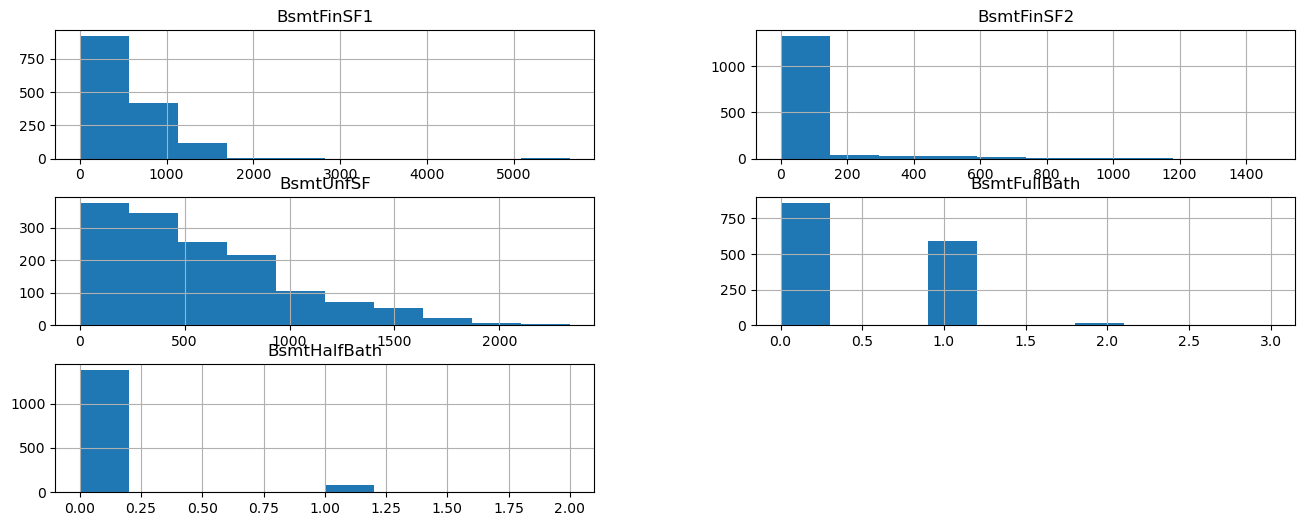

In [28]:
# missing values for numerical_bsmt_features only on test dataframe
train_df[numerical_bsmt_features].hist(figsize=(16,6))

In [29]:
test_df.loc[test_df[numerical_bsmt_features].isnull().any(axis=1),test_bsmt_mask]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN


In [30]:
categorical_bsmt_features = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]

In [31]:
bsmt_train_null_mask = train_df[categorical_bsmt_features].isnull().any(axis=1)
bsmt_train_null_mask_all = train_df[categorical_bsmt_features].isnull().all(axis=1)

bsmt_train_single_null_mask = (~bsmt_train_null_mask_all) & (bsmt_train_null_mask) 

train_df.loc[bsmt_train_single_null_mask,categorical_bsmt_features]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
332,Gd,TA,No,GLQ,NaN
948,Gd,TA,NaN,Unf,Unf


In [32]:
bsmt_test_null_mask = test_df[categorical_bsmt_features].isnull().any(axis=1)
bsmt_test_null_mask_all = test_df[categorical_bsmt_features].isnull().all(axis=1)

bsmt_test_single_null_mask = (~bsmt_test_null_mask_all) & (bsmt_test_null_mask) 

test_df.loc[bsmt_test_single_null_mask,categorical_bsmt_features]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
27,Gd,TA,NaN,Unf,Unf
580,Gd,NaN,Mn,GLQ,Rec
725,TA,NaN,No,BLQ,Unf
757,NaN,Fa,No,Unf,Unf
758,NaN,TA,No,Unf,Unf
888,Gd,TA,NaN,Unf,Unf
1064,TA,NaN,Av,ALQ,Unf


In [33]:
fill_null_dict_bsmt = dict([(column, 'NA') for column in categorical_bsmt_features] + [(column, 0) for column in numerical_bsmt_features])
fill_null_dict_bsmt

{'BsmtQual': 'NA',
 'BsmtCond': 'NA',
 'BsmtExposure': 'NA',
 'BsmtFinType1': 'NA',
 'BsmtFinType2': 'NA',
 'BsmtFinSF1': 0,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0}

### Starts with MasVnr investigation
- Fill with most common value where "MasVnrAra" from `fill_nulls_dict_mas_vnr`, which is "None"
- Fill "MasVnrAra" with zeros

In [34]:
mas_vnr_cols_mask = train_df.columns.str.startswith("MasVnr")
mas_vnr_nulls_mask = train_df.loc[:,mas_vnr_cols_mask].isnull().any(axis=1)
train_df.loc[mas_vnr_nulls_mask,mas_vnr_cols_mask]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [35]:
mas_vnr_cols_mask = test_df.columns.str.startswith("MasVnr")
mas_vnr_nulls_mask = test_df.loc[:,mas_vnr_cols_mask].isnull().any(axis=1)
test_df.loc[mas_vnr_nulls_mask,mas_vnr_cols_mask]

,MasVnrType,MasVnrArea
231,NaN,NaN
246,NaN,NaN
422,NaN,NaN
532,NaN,NaN
544,NaN,NaN
581,NaN,NaN
851,NaN,NaN
865,NaN,NaN
880,NaN,NaN
889,NaN,NaN


In [36]:
fill_nulls_dict_mas_vnr = {"MasVnrType": train_df["MasVnrType"].value_counts().idxmax()}
fill_nulls_dict_mas_vnr

{'MasVnrType': 'None'}

### Additional features investigation
- Fill TotalBsmtSF nulls with Mean
- Fil ['Electrical','MSZoning', 'Utilities', 'Functional', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'SaleType'] with mode / most common value in `fill_nulls_dict_additional_features`

In [37]:
additional_features_with_nulls = ['Electrical','MSZoning', 'Utilities', 'Functional', 'KitchenQual', 'TotalBsmtSF', 'Exterior2nd', 'Exterior1st', 'SaleType']

train_df.loc[:,additional_features_with_nulls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Electrical   1459 non-null   object
 1   MSZoning     1460 non-null   object
 2   Utilities    1460 non-null   object
 3   Functional   1460 non-null   object
 4   KitchenQual  1460 non-null   object
 5   TotalBsmtSF  1460 non-null   int64 
 6   Exterior2nd  1460 non-null   object
 7   Exterior1st  1460 non-null   object
 8   SaleType     1460 non-null   object
dtypes: int64(1), object(8)
memory usage: 102.8+ KB


In [38]:
test_df.loc[:,additional_features_with_nulls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Electrical   1459 non-null   object 
 1   MSZoning     1455 non-null   object 
 2   Utilities    1457 non-null   object 
 3   Functional   1457 non-null   object 
 4   KitchenQual  1458 non-null   object 
 5   TotalBsmtSF  1458 non-null   float64
 6   Exterior2nd  1458 non-null   object 
 7   Exterior1st  1458 non-null   object 
 8   SaleType     1458 non-null   object 
dtypes: float64(1), object(8)
memory usage: 102.7+ KB


In [39]:
is_null_mask_additional_features = test_df.loc[:,additional_features_with_nulls].isnull().any(axis=1)
test_df.loc[is_null_mask_additional_features, additional_features_with_nulls]

,Electrical,MSZoning,Utilities,Functional,KitchenQual,TotalBsmtSF,Exterior2nd,Exterior1st,SaleType
95,SBrkr,RL,AllPub,Mod,NaN,689.0,Wd Sdng,Wd Sdng,COD
455,FuseA,NaN,NaN,Min1,TA,0.0,Wd Sdng,Wd Sdng,ConLD
485,FuseA,RL,NaN,Min2,TA,1632.0,BrkFace,BrkFace,WD
660,FuseA,RM,AllPub,Typ,TA,NaN,CBlock,MetalSd,ConLD
691,SBrkr,RL,AllPub,Typ,Fa,1580.0,NaN,NaN,WD
756,FuseA,NaN,AllPub,NaN,Fa,0.0,VinylSd,AsbShng,WD
790,SBrkr,NaN,AllPub,Maj1,TA,686.0,Wd Sdng,Wd Sdng,WD
1013,SBrkr,RM,AllPub,NaN,TA,771.0,Wd Sdng,Wd Sdng,COD
1029,SBrkr,RL,AllPub,Typ,TA,1158.0,Plywood,Plywood,NaN
1444,FuseA,NaN,AllPub,Mod,TA,0.0,VinylSd,CBlock,WD


<Axes: >

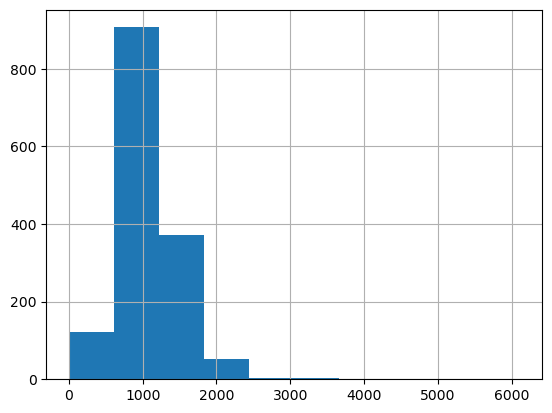

In [40]:
# numerical value, let's see whether it is normal or not
train_df["TotalBsmtSF"].hist()

<Axes: >

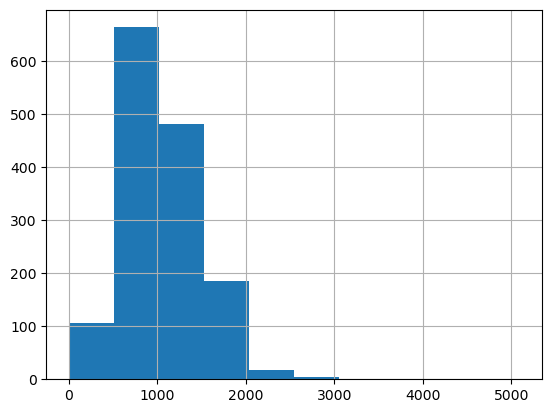

In [41]:
test_df["TotalBsmtSF"].hist()

In [42]:
additional_features_with_nulls = ['Electrical','MSZoning', 'Utilities', 'Functional', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'SaleType']
fill_nulls_dict_additional_features = dict([(column,train_df[column].value_counts().idxmax()) for column in additional_features_with_nulls])
fill_nulls_dict_additional_features

{'Electrical': 'SBrkr',
 'MSZoning': 'RL',
 'Utilities': 'AllPub',
 'Functional': 'Typ',
 'KitchenQual': 'TA',
 'Exterior2nd': 'VinylSd',
 'Exterior1st': 'VinylSd',
 'SaleType': 'WD'}

## Feature Selection
- Features  ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"] will already be dropped
- The remaining features should be analyzed with relation to "SalePrice" log in order to  draw conclusions

### Breaking categorical and numerical features

In [43]:
columns_to_select = list(set(train_df.columns) - {"PoolQC","MiscFeature","Alley","Fence","FireplaceQu","Id","SalePrice"})
print(columns_to_select)

['BsmtQual', 'CentralAir', 'BsmtUnfSF', 'BsmtFinSF1', 'RoofStyle', 'YearRemodAdd', 'GarageType', 'PavedDrive', 'MoSold', 'Neighborhood', 'BedroomAbvGr', 'Utilities', 'SaleCondition', 'MiscVal', 'OverallQual', 'LandContour', 'Street', 'HouseStyle', 'BldgType', 'TotalBsmtSF', 'GarageCars', 'GrLivArea', 'LowQualFinSF', 'LotConfig', 'PoolArea', 'LotArea', 'Condition2', 'GarageQual', 'Exterior2nd', 'RoofMatl', 'Fireplaces', 'HeatingQC', 'ScreenPorch', 'BsmtFinType2', 'MasVnrType', 'Condition1', 'ExterCond', 'FullBath', 'KitchenAbvGr', 'MasVnrArea', 'BsmtFullBath', 'OpenPorchSF', 'KitchenQual', 'HalfBath', 'BsmtFinSF2', '2ndFlrSF', 'MSSubClass', 'LotFrontage', 'YearBuilt', 'BsmtCond', 'Exterior1st', 'GarageYrBlt', 'BsmtExposure', 'OverallCond', 'MSZoning', 'BsmtHalfBath', 'Heating', 'ExterQual', 'BsmtFinType1', 'WoodDeckSF', 'LotShape', 'YrSold', 'EnclosedPorch', 'GarageFinish', 'Functional', '1stFlrSF', 'GarageCond', 'LandSlope', 'TotRmsAbvGrd', '3SsnPorch', 'GarageArea', 'Foundation', 'Ele

In [44]:
train_df[columns_to_select].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BsmtQual       1423 non-null   object 
 1   CentralAir     1460 non-null   object 
 2   BsmtUnfSF      1460 non-null   int64  
 3   BsmtFinSF1     1460 non-null   int64  
 4   RoofStyle      1460 non-null   object 
 5   YearRemodAdd   1460 non-null   int64  
 6   GarageType     1379 non-null   object 
 7   PavedDrive     1460 non-null   object 
 8   MoSold         1460 non-null   int64  
 9   Neighborhood   1460 non-null   object 
 10  BedroomAbvGr   1460 non-null   int64  
 11  Utilities      1460 non-null   object 
 12  SaleCondition  1460 non-null   object 
 13  MiscVal        1460 non-null   int64  
 14  OverallQual    1460 non-null   int64  
 15  LandContour    1460 non-null   object 
 16  Street         1460 non-null   object 
 17  HouseStyle     1460 non-null   object 
 18  BldgType

In [45]:
number_features = list(train_df[columns_to_select].select_dtypes(include=np.number).columns)
print(len(number_features),number_features)

36 ['BsmtUnfSF', 'BsmtFinSF1', 'YearRemodAdd', 'MoSold', 'BedroomAbvGr', 'MiscVal', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'GrLivArea', 'LowQualFinSF', 'PoolArea', 'LotArea', 'Fireplaces', 'ScreenPorch', 'FullBath', 'KitchenAbvGr', 'MasVnrArea', 'BsmtFullBath', 'OpenPorchSF', 'HalfBath', 'BsmtFinSF2', '2ndFlrSF', 'MSSubClass', 'LotFrontage', 'YearBuilt', 'GarageYrBlt', 'OverallCond', 'BsmtHalfBath', 'WoodDeckSF', 'YrSold', 'EnclosedPorch', '1stFlrSF', 'TotRmsAbvGrd', '3SsnPorch', 'GarageArea']


In [46]:
categorical_features = list(set(train_df[columns_to_select].columns) - set(number_features))
print(len(categorical_features),categorical_features)

38 ['BsmtQual', 'CentralAir', 'RoofStyle', 'GarageType', 'PavedDrive', 'Neighborhood', 'Utilities', 'SaleCondition', 'BsmtCond', 'Exterior1st', 'BsmtExposure', 'LandContour', 'Street', 'HouseStyle', 'BldgType', 'MSZoning', 'LotConfig', 'Heating', 'ExterQual', 'BsmtFinType1', 'LotShape', 'GarageFinish', 'Functional', 'Condition2', 'GarageQual', 'Exterior2nd', 'RoofMatl', 'GarageCond', 'LandSlope', 'HeatingQC', 'BsmtFinType2', 'MasVnrType', 'Condition1', 'ExterCond', 'KitchenQual', 'Foundation', 'Electrical', 'SaleType']


### Visualizing Numerical features in correlation with the log of SalesPrice
- Some correlations, but there are too many features, let's just fit a simple random forest in order to check for feature importance

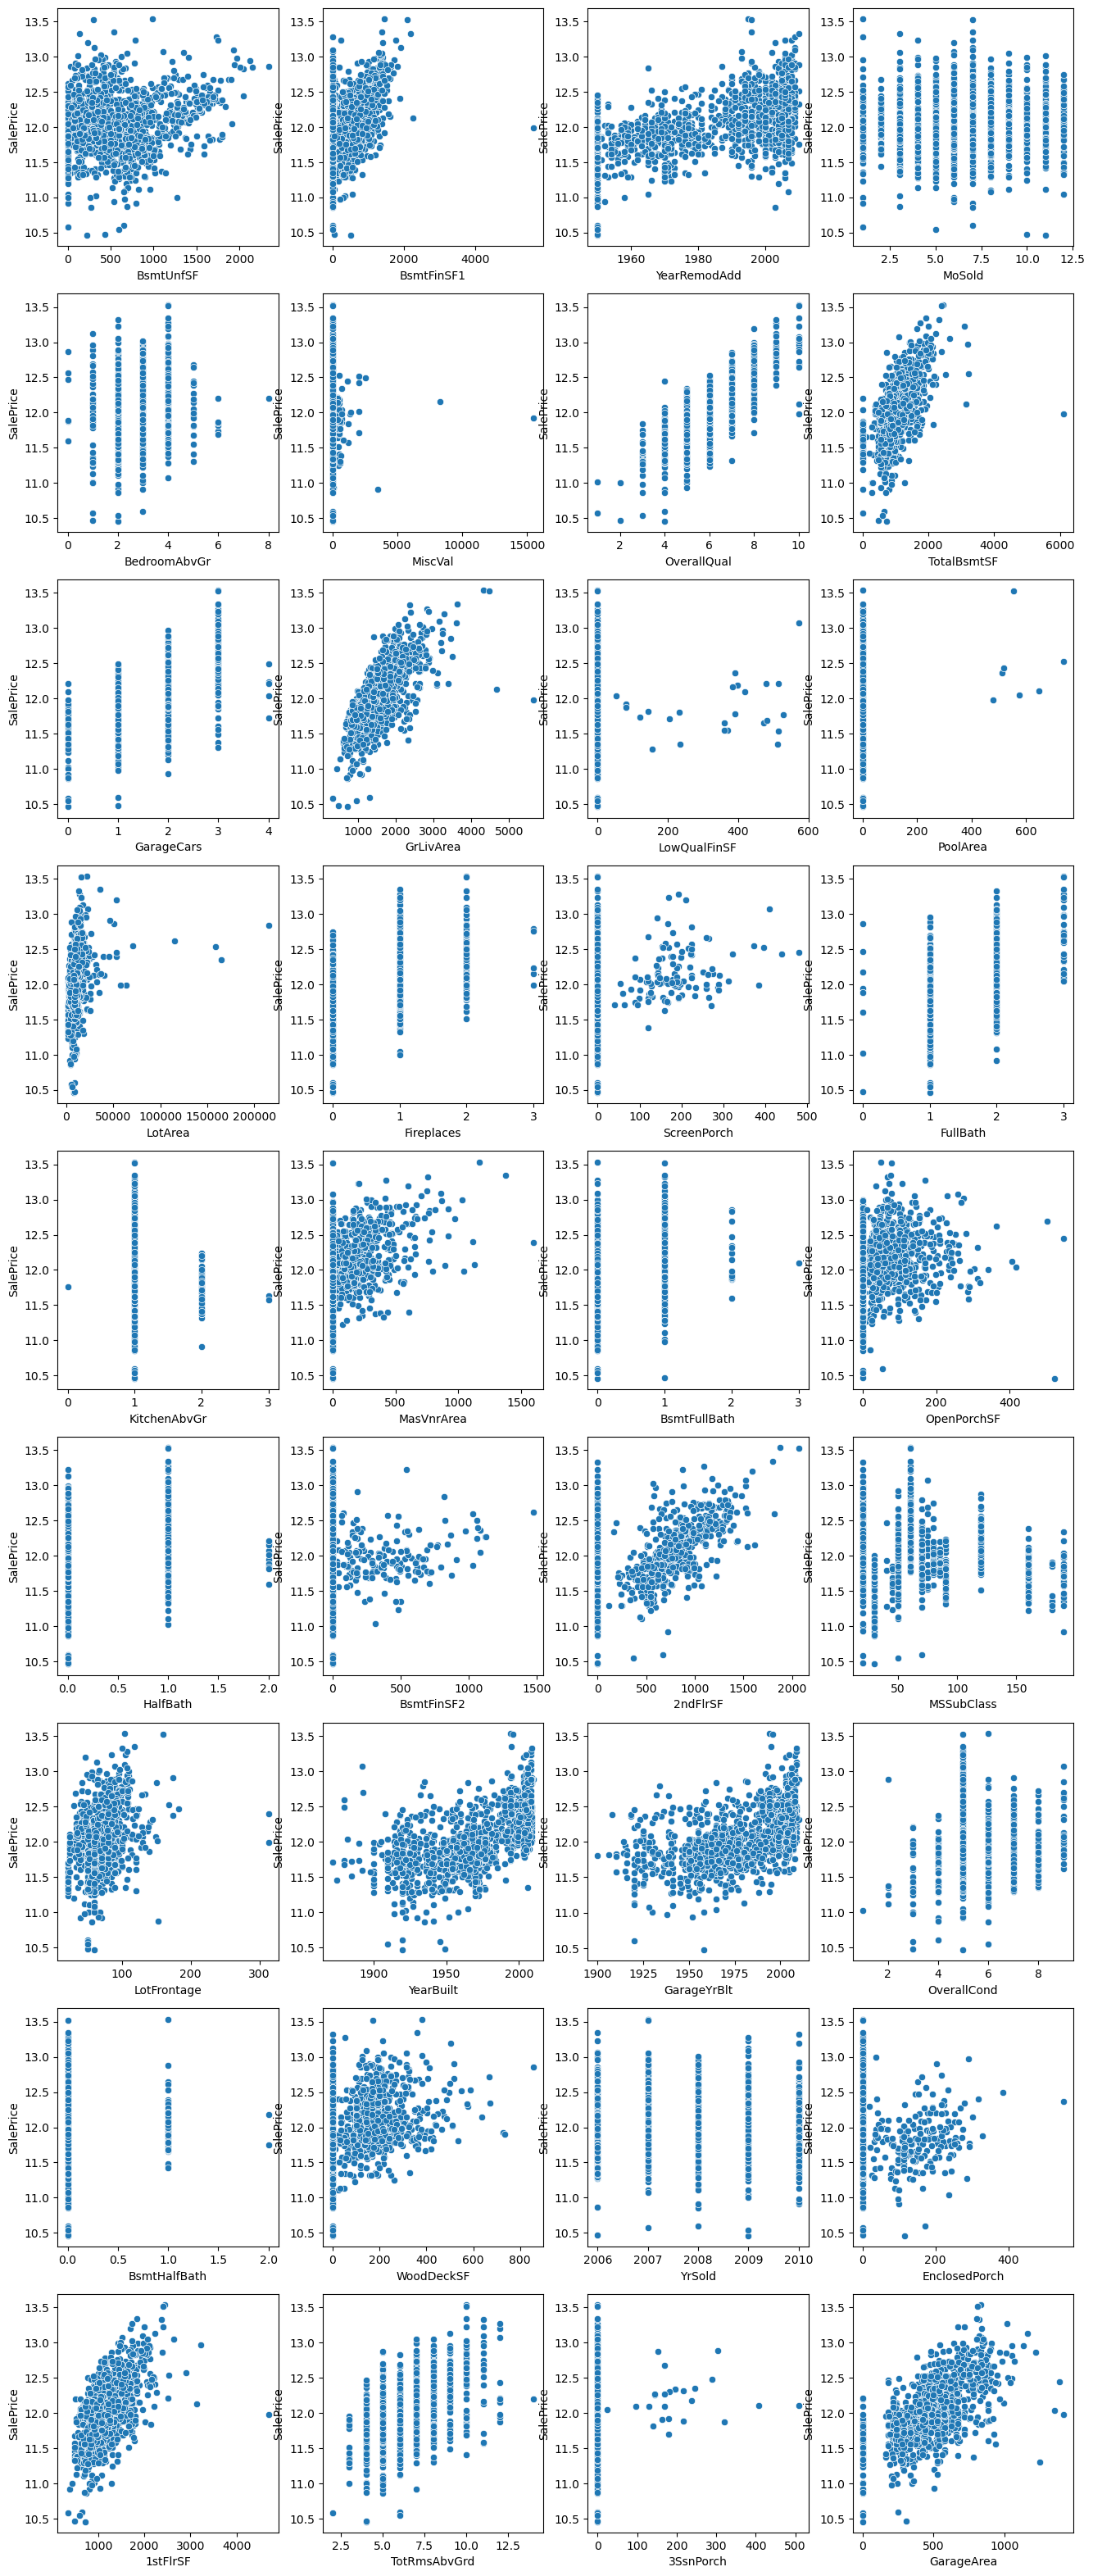

In [47]:
number_of_cols = 4
number_of_rows = (len(number_features) // number_of_cols) + (len(number_features) % number_of_cols > 0)
fig, axes = plt.subplots(nrows= number_of_rows , ncols=number_of_cols, figsize=(16,40))

log_sale_price = np.log(train_df["SalePrice"])

for idx, feature in enumerate(number_features):
    row_index = idx // number_of_cols
    col_index = idx % number_of_cols
    sns.scatterplot(x=train_df[feature],y=log_sale_price,ax=axes[row_index][col_index])

### Visualizing Categorical features in correlation with the log of SalesPrice

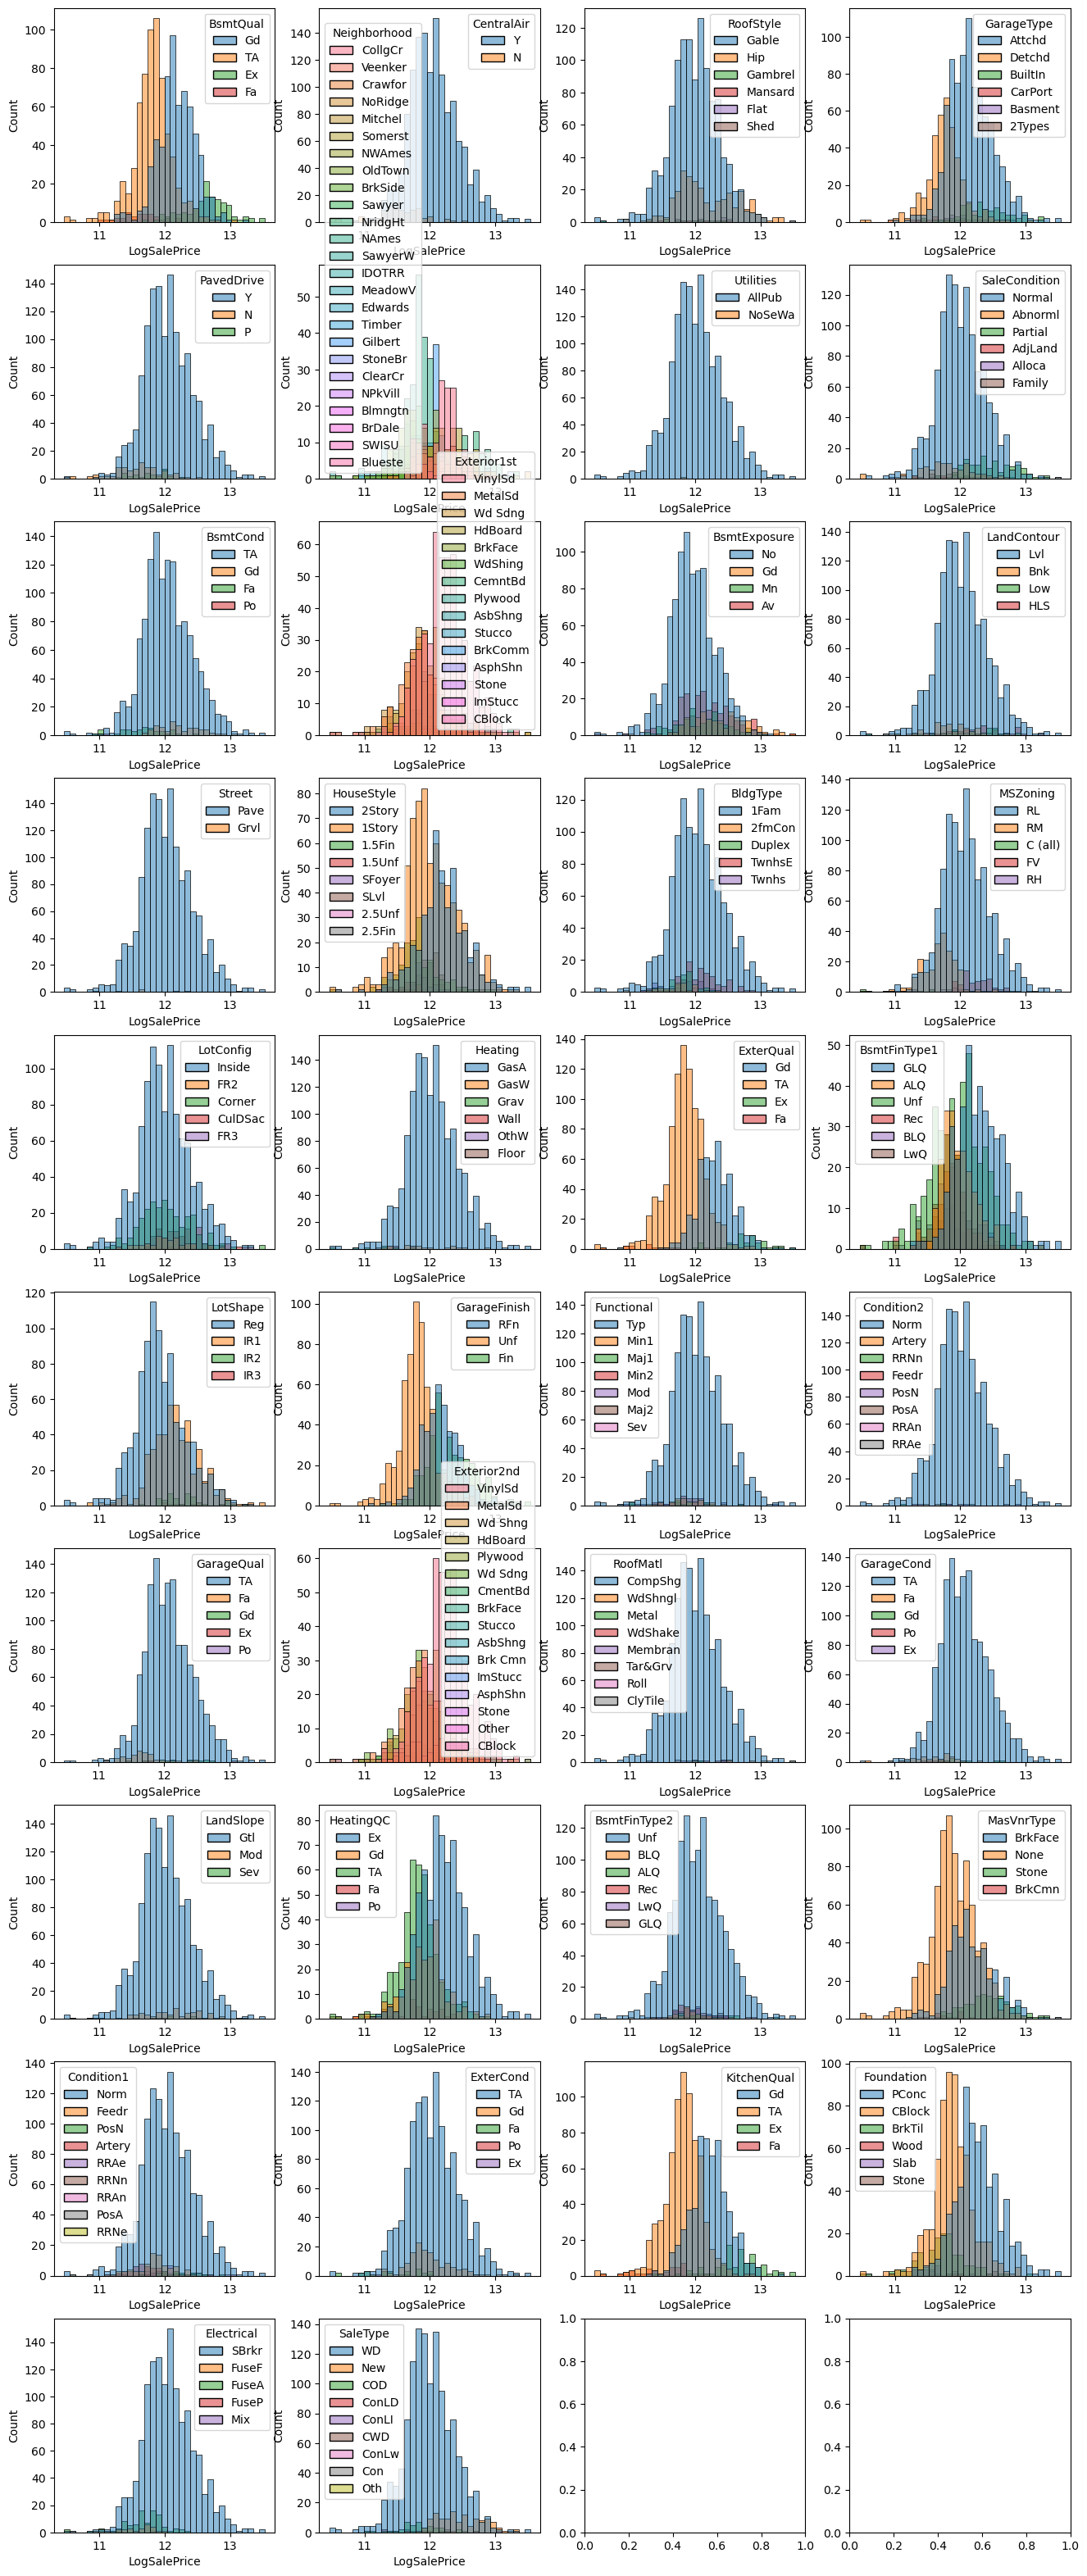

In [48]:
number_of_cols = 4
number_of_rows = (len(categorical_features) // number_of_cols) + (len(categorical_features) % number_of_cols > 0)
fig, axes = plt.subplots(nrows= number_of_rows , ncols=number_of_cols, figsize=(16,40))

df_plot = train_df.copy()
df_plot["LogSalePrice"] = np.log(train_df["SalePrice"])

for idx, feature in enumerate(categorical_features):
    row_index = idx // number_of_cols
    col_index = idx % number_of_cols
    # means = df_plot.groupby(feature)["LogSalePrice"].mean().sort_values(ascending=False)
    # sns.barplot(y=means.index,x=means.values,ax=axes[row_index][col_index])
    sns.histplot(df_plot,x="LogSalePrice", hue=feature, ax=axes[row_index][col_index])

### Feature elicitation of numeric variables
- Selecting best features based on a simple random forest model that does not require big transformations in data overall
- Key numerical features are: ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'YearBuilt','1stFlrSF', 'BsmtFinSF1', 'OverallCond', 'LotArea', 'GarageArea']

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf = RandomForestRegressor(n_estimators = 10, n_jobs=3)

X_predictor = train_df[number_features].dropna()
y_target = np.log(train_df.loc[X_predictor.index,"SalePrice"])

In [51]:
rf.fit(X_predictor, y_target)

RandomForestRegressor(n_estimators=10, n_jobs=3)

<Axes: >

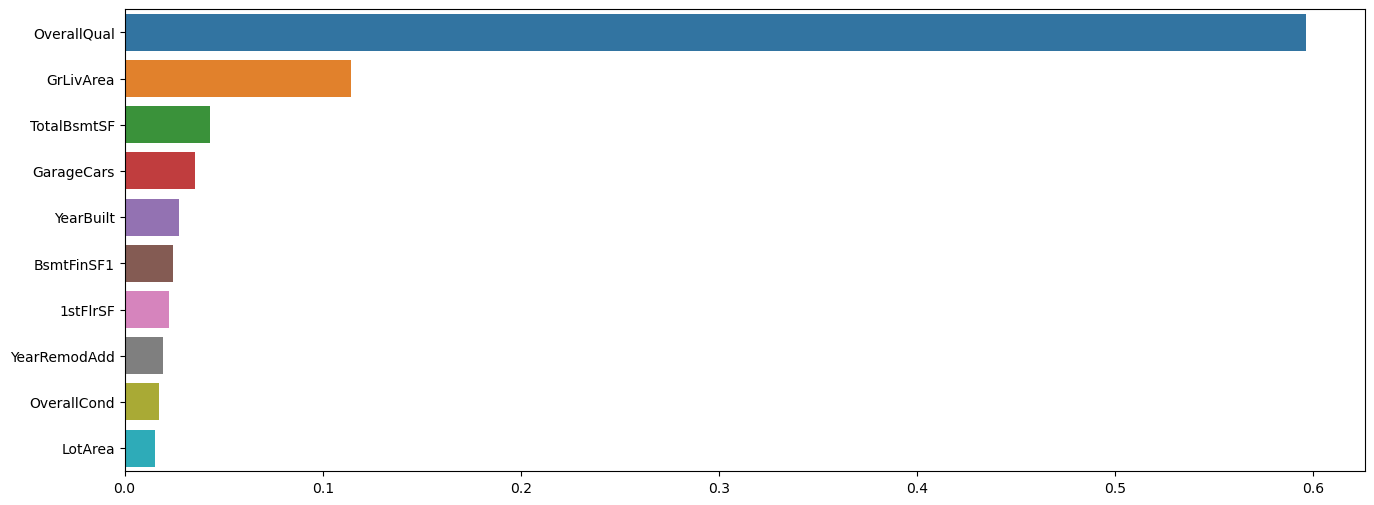

In [52]:
feature_importances = pd.Series(data = rf.feature_importances_, index= X_predictor.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(16,6))
sns.barplot(x= feature_importances.values[:10], y = feature_importances.index[:10])

In [53]:
print(feature_importances.index[:10])

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'YearBuilt',
       'BsmtFinSF1', '1stFlrSF', 'YearRemodAdd', 'OverallCond', 'LotArea'],
      dtype='object')


### Feature elicitation of categorical variables
- Selecting best features based on a simple random forest model that does not require big transformations in data overall
- Key numerical features are: ['ExterQual', 'KitchenQual', 'BsmtQual', 'GarageType', 'Neighborhood',
       'MSZoning', 'HouseStyle', 'GarageFinish', 'Exterior2nd',
       'BsmtFinType1']

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
rf = RandomForestRegressor(n_estimators = 10, n_jobs=3)

In [56]:
X_predictor = train_df[categorical_features].dropna()
y_target = np.log(train_df.loc[X_predictor.index,"SalePrice"])

encoder = LabelEncoder()
X_encoded_predictors = X_predictor.apply(encoder.fit_transform)

In [57]:
X_encoded_predictors

,BsmtQual,CentralAir,RoofStyle,GarageType,PavedDrive,Neighborhood,Utilities,SaleCondition,BsmtCond,Exterior1st,...,LandSlope,HeatingQC,BsmtFinType2,MasVnrType,Condition1,ExterCond,KitchenQual,Foundation,Electrical,SaleType
0,2,1,1,1,2,5,0,4,3,11,...,0,0,5,1,2,3,2,2,4,8
1,2,1,1,1,2,24,0,4,3,7,...,0,0,5,2,1,3,3,1,4,8
2,2,1,1,1,2,5,0,4,3,11,...,0,0,5,1,2,3,2,2,4,8
3,3,1,1,5,2,6,0,0,1,12,...,0,2,5,2,2,3,2,0,4,8
4,2,1,1,1,2,15,0,4,3,11,...,0,0,5,1,2,3,2,2,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,1,1,1,2,8,0,4,3,11,...,0,0,5,2,2,3,3,2,4,8
1456,2,1,1,1,2,14,0,4,3,8,...,0,4,4,3,2,3,3,1,4,8
1457,3,1,1,1,2,6,0,4,1,4,...,0,0,5,2,2,2,2,3,4,8
1458,3,1,3,1,2,12,0,4,3,7,...,0,2,4,2,2,3,2,1,0,8


In [58]:
rf.fit(X_encoded_predictors, y_target)

RandomForestRegressor(n_estimators=10, n_jobs=3)

<Axes: >

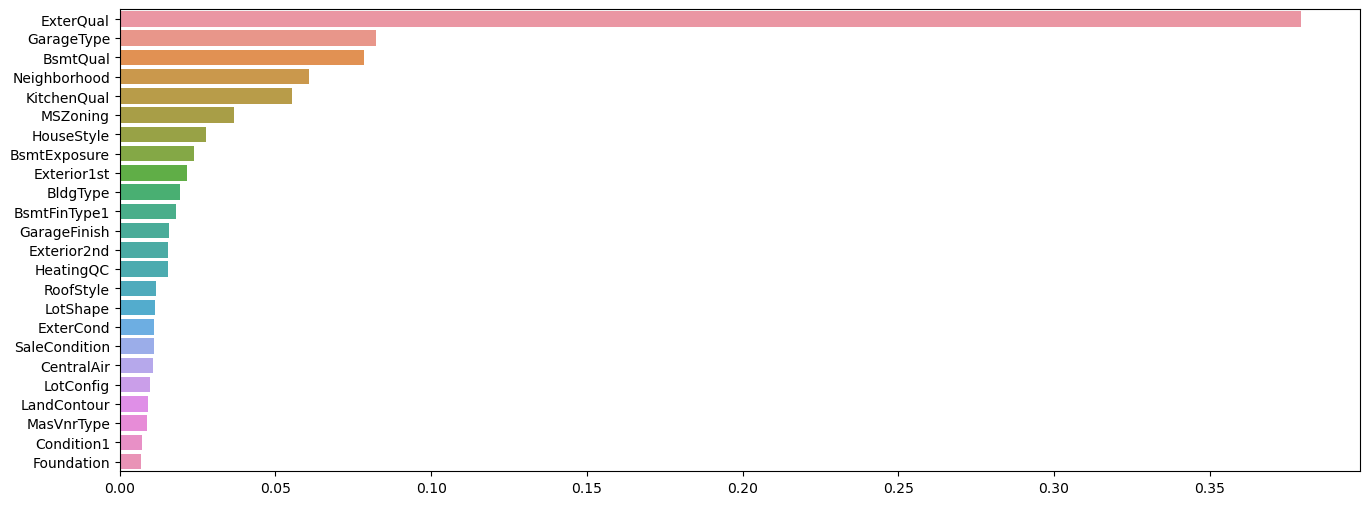

In [59]:
categorical_feature_importances = pd.Series(data = rf.feature_importances_, index= X_predictor.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(16,6))
sns.barplot(x= categorical_feature_importances.values[:24], y = categorical_feature_importances.index[:24])

In [60]:
print(categorical_feature_importances.index[:10])

Index(['ExterQual', 'GarageType', 'BsmtQual', 'Neighborhood', 'KitchenQual',
       'MSZoning', 'HouseStyle', 'BsmtExposure', 'Exterior1st', 'BldgType'],
      dtype='object')


# Feature Engineering

### Decorator for deep copy

Just add `@deep_copy_df` before your handler functions to process

In [61]:
# Receives a function that receives a dataframe + arguments, returns the same function, but with a deep copy from dataframe
def deep_copy_df(func):
    def deep_copy_wrapper(dataframe, *args, **kwargs):
        return func(dataframe.copy(), *args, **kwargs)
    return deep_copy_wrapper

In [62]:
@deep_copy_df
def test_func(dataframe, value1, value2):
    dataframe["NewCol1"]  = value1
    dataframe["NewCol2"]  = value2
    return dataframe

dummy_df = pd.DataFrame(data={'col1': [1, 2], 'col2': [3, 4]})
print(dummy_df)
modified_dummy_df = dummy_df.pipe(test_func, "KKK", "LLL")
print(dummy_df)
print(modified_dummy_df)

dict(dummy_df.mean())

   col1  col2
0     1     3
1     2     4
   col1  col2
0     1     3
1     2     4
   col1  col2 NewCol1 NewCol2
0     1     3     KKK     LLL
1     2     4     KKK     LLL


{'col1': 1.5, 'col2': 3.5}

## Defining functions for transformation

### Drop unwanted features

In [63]:
@deep_copy_df
def drop_features(dataframe, features):
    return dataframe.drop(features, axis=1)

### Handling nulls

In [64]:
@deep_copy_df
def fill_with_mean(dataframe, features):
    mapping = dict(dataframe[features].mean())
    return dataframe.fillna(value= mapping)

@deep_copy_df
def fill_with_median(dataframe, features):
    mapping = dict(dataframe[features].median())
    return dataframe.fillna(value= mapping)

@deep_copy_df
def fill_with_zeros(dataframe, features):
    mapping = dict([(feat, 0) for feat in features])
    return dataframe.fillna(value= mapping)

@deep_copy_df
def fill_with_constant(dataframe, features, constant_value):
    mapping = dict([(feat, constant_value) for feat in features])
    return dataframe.fillna(value= mapping)

@deep_copy_df
def fill_with_mode(dataframe, features):
    mapping = dict([(feature, dataframe[feature].value_counts().idxmax()) for feature in features])
    return dataframe.fillna(value= mapping)

@deep_copy_df
def fill_with_dict(dataframe, mapping_dict):
    return dataframe.fillna(value= mapping_dict)

### Transformations

In [65]:
@deep_copy_df
def log_transform_features(dataframe, features, constant=0):
    dataframe.loc[:,features] = dataframe[features].apply(lambda x: np.log(x + constant))
    return dataframe

## Applying transformations

In [66]:
@deep_copy_df
def apply_data_transformation_pipeline(dataframe):
    return (dataframe
            .pipe(drop_features, ["Id","PoolQC","MiscFeature","Alley","Fence","FireplaceQu"])
            .pipe(log_transform_features, ["LotFrontage"], 0)
            .pipe(fill_with_mean, ["LotFrontage"])
            .pipe(fill_with_constant,["GarageType","GarageFinish","GarageQual","GarageCond"], "NA")
            .pipe(fill_with_zeros, ["GarageYrBlt","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","BsmtFullBath","BsmtHalfBath"])
            .pipe(fill_with_constant,["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"], "NA")
            .pipe(fill_with_dict, fill_null_dict_garage_numerical)
            .pipe(fill_with_constant,["MasVnrType"], "None")
            .pipe(fill_with_zeros, ["MasVnrArea"])
            .pipe(fill_with_mode,['Electrical','MSZoning', 'Utilities', 'Functional', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'SaleType'])
            .pipe(fill_with_mean, ["TotalBsmtSF"]))

In [67]:
@deep_copy_df
def get_predictors_and_target(dataframe):
    target = np.log(dataframe["SalePrice"])
    predictors = dataframe.drop("SalePrice",axis=1)
    return predictors, target

In [68]:
X_train, y_train = (train_df
                    .pipe(apply_data_transformation_pipeline)
                    .pipe(get_predictors_and_target))

In [69]:
X_test = (test_df.pipe(apply_data_transformation_pipeline))

In [70]:
X_train.shape, y_train.shape, X_test.shape

((1460, 74), (1460,), (1459, 74))

### Encoding

In [71]:
unique_values_categ = X_train[categorical_features].apply(lambda series: series.unique()).apply(lambda ls: np.sort(ls))
unique_values_categ

BsmtQual                                      [Ex, Fa, Gd, NA, TA]
CentralAir                                                  [N, Y]
RoofStyle               [Flat, Gable, Gambrel, Hip, Mansard, Shed]
GarageType       [2Types, Attchd, Basment, BuiltIn, CarPort, De...
PavedDrive                                               [N, P, Y]
Neighborhood     [Blmngtn, Blueste, BrDale, BrkSide, ClearCr, C...
Utilities                                         [AllPub, NoSeWa]
SaleCondition    [Abnorml, AdjLand, Alloca, Family, Normal, Par...
BsmtCond                                      [Fa, Gd, NA, Po, TA]
Exterior1st      [AsbShng, AsphShn, BrkComm, BrkFace, CBlock, C...
BsmtExposure                                  [Av, Gd, Mn, NA, No]
LandContour                                   [Bnk, HLS, Low, Lvl]
Street                                                [Grvl, Pave]
HouseStyle       [1.5Fin, 1.5Unf, 1Story, 2.5Fin, 2.5Unf, 2Stor...
BldgType                     [1Fam, 2fmCon, Duplex, Twnhs, Twn

In [72]:
# Ex, Gd, TA, Fa, Po
is_scale_mask = (  (X_train[categorical_features] == "Ex")
                 | (X_train[categorical_features] == "Gd") 
                 | (X_train[categorical_features] == "TA")
                 | (X_train[categorical_features] == "Fa") 
                 | (X_train[categorical_features] == "Po") ).any(axis=0)
scale_features = list(X_train[categorical_features].columns[is_scale_mask])
scale_features.remove("BsmtExposure")
print(scale_features)
scale_features_encoding = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0}

['BsmtQual', 'BsmtCond', 'ExterQual', 'GarageQual', 'GarageCond', 'HeatingQC', 'ExterCond', 'KitchenQual']


In [73]:
electrical_encoding = {"SBrkr": 5, "FuseA": 4, "FuseF": 3, "Mix": 2, "FuseP":1}

In [74]:
central_air_encoding = {"Y": 1, "N": 0}

In [75]:
paved_drive_encoding = {"Y": 3, "P": 2, "N": 1}

In [76]:
@deep_copy_df
def apply_encode_map(dataframe, features, encode_map):
    new_values = dataframe[features].replace(encode_map).astype('int64')
    dataframe.update(new_values)
    return dataframe

In [77]:
@deep_copy_df
def fit_label_encoders(dataframe, features, label_encoders_list):
    for col_index, encoder in enumerate(label_encoders_list):
        feature = features[col_index]
        encoder.fit(dataframe[feature])
    return dataframe

In [78]:
@deep_copy_df
def transform_label_encoders(dataframe, features, fitted_label_encoders_list):
    for col_index, encoder in enumerate(fitted_label_encoders_list):
        feature = features[col_index]
        dataframe[feature] = encoder.transform(dataframe[feature])
    return dataframe

In [111]:
@deep_copy_df
def transform_to_numeric(dataframe):
    return dataframe.apply(pd.to_numeric)

In [79]:
features_to_be_label_encoded = list(set(categorical_features) - set(scale_features) - set(["Electrical","CentralAir","PavedDrive"]))
label_encoders = [LabelEncoder() for feature in features_to_be_label_encoded]

In [112]:
X_train = (X_train
    .pipe(apply_encode_map,scale_features, scale_features_encoding)
    .pipe(apply_encode_map,"Electrical", electrical_encoding)
    .pipe(apply_encode_map,"CentralAir", central_air_encoding)
    .pipe(apply_encode_map,"PavedDrive", paved_drive_encoding)
    .pipe(fit_label_encoders,features_to_be_label_encoded, label_encoders)
    .pipe(transform_label_encoders,features_to_be_label_encoded, label_encoders)
    .pipe(transform_to_numeric))

In [113]:
X_test = (X_test
          .pipe(apply_encode_map,scale_features, scale_features_encoding)
          .pipe(apply_encode_map,"Electrical", electrical_encoding)
          .pipe(apply_encode_map,"CentralAir", central_air_encoding)
          .pipe(apply_encode_map,"PavedDrive", paved_drive_encoding)
          .pipe(transform_label_encoders,features_to_be_label_encoded, label_encoders)
          .pipe(transform_to_numeric))

In [114]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [115]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   int64  
 5   LotShape       1459 non-null   int64  
 6   LandContour    1459 non-null   int64  
 7   Utilities      1459 non-null   int64  
 8   LotConfig      1459 non-null   int64  
 9   LandSlope      1459 non-null   int64  
 10  Neighborhood   1459 non-null   int64  
 11  Condition1     1459 non-null   int64  
 12  Condition2     1459 non-null   int64  
 13  BldgType       1459 non-null   int64  
 14  HouseStyle     1459 non-null   int64  
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

# Feature selection

In [116]:
from sklearn.ensemble import ExtraTreesRegressor

In [117]:
et = ExtraTreesRegressor(n_estimators = 20, n_jobs=3)
rf = RandomForestRegressor(n_estimators = 20, n_jobs=3)

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_split_train, X_split_val, y_split_train, y_split_val = train_test_split(X_train, y_train, test_size=0.3, random_state=2023)

In [120]:
X_split_train.shape, X_split_val.shape, y_split_train.shape, y_split_val.shape

((1022, 74), (438, 74), (1022,), (438,))

In [121]:
et.fit(X_split_train, y_split_train)
rf.fit(X_split_train, y_split_train)

RandomForestRegressor(n_estimators=20, n_jobs=3)

<Axes: >

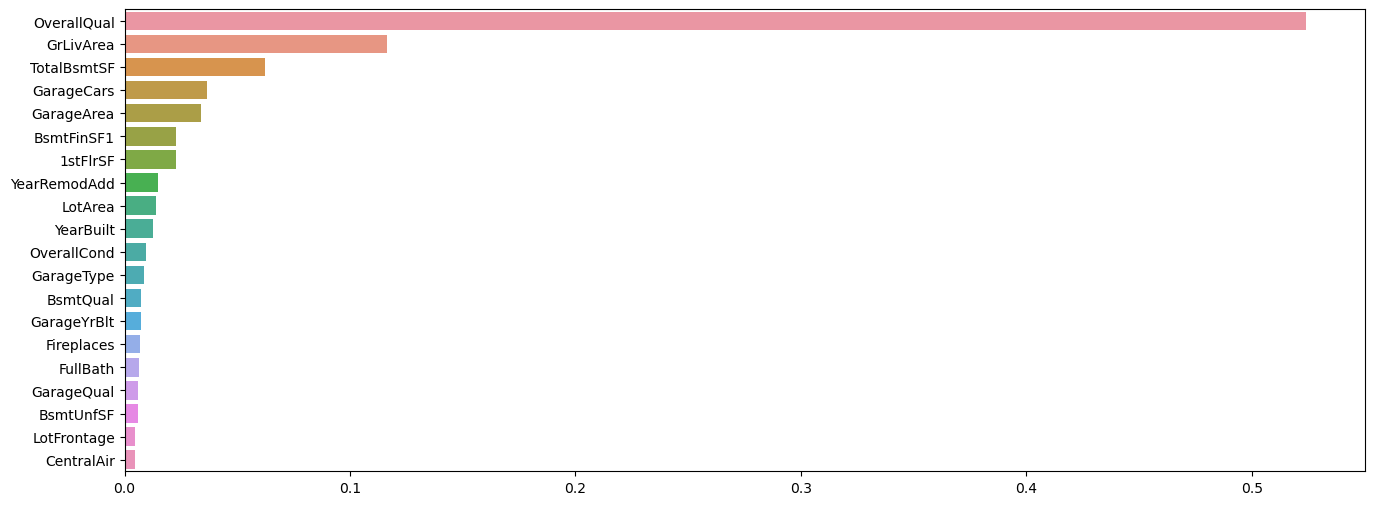

In [122]:
feature_importances_rf = pd.Series(data = rf.feature_importances_, index= X_train.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(16,6))
sns.barplot(x= feature_importances_rf.values[:20], y = feature_importances_rf.index[:20])

<Axes: >

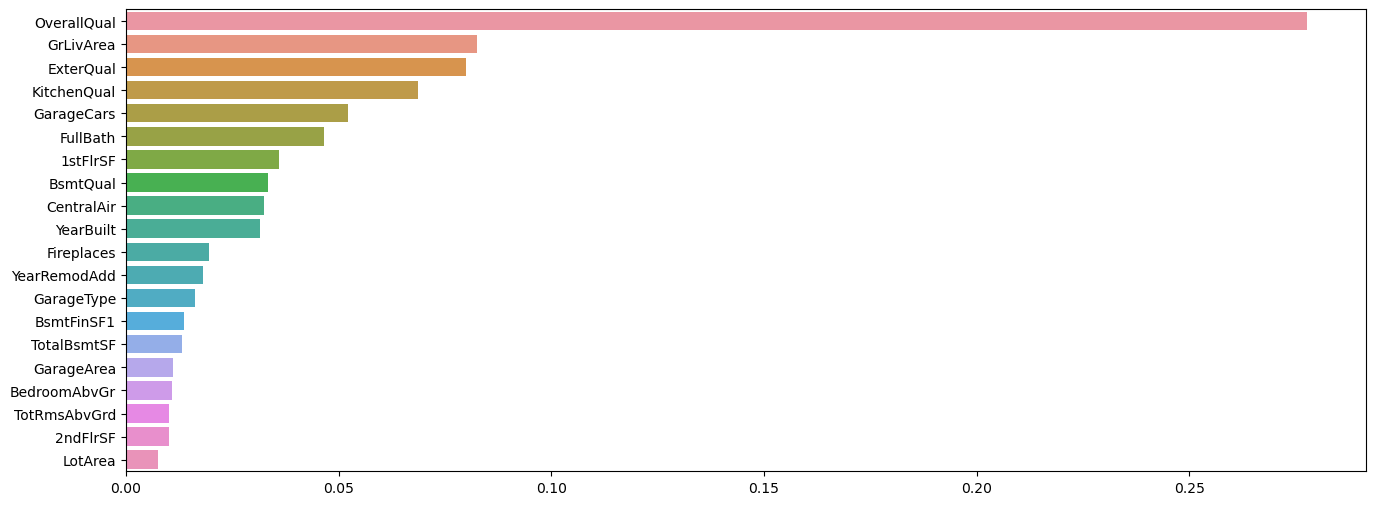

In [123]:
feature_importances_et = pd.Series(data = et.feature_importances_, index= X_train.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(16,6))
sns.barplot(x= feature_importances_et.values[:20], y = feature_importances_et.index[:20])

In [124]:
# I know this is "overfitted" given I am predicting with train values, just checking on what RMSE basis is this feature_iportances based on
from sklearn.metrics import mean_squared_error

print("ET MSE: ", mean_squared_error(np.log(y_split_val), et.predict(X_split_val)))
print("RF MSE: ", mean_squared_error(np.log(y_split_val), rf.predict(X_split_val)))

ET MSE:  91.46213112690268
RF MSE:  91.48926186510344


In [159]:
most_important_features = list(set(feature_importances_et.index[:20]).union(set(feature_importances_rf.index[:20])))
print(f"len imp feat: {len(most_important_features)}, features: ", most_important_features)

len imp feat: 25, features:  ['BsmtQual', 'CentralAir', '2ndFlrSF', 'BsmtUnfSF', 'BsmtFinSF1', 'YearRemodAdd', 'GarageType', 'BedroomAbvGr', 'LotFrontage', 'YearBuilt', 'GarageYrBlt', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageCars', 'GrLivArea', 'ExterQual', 'LotArea', '1stFlrSF', 'GarageQual', 'Fireplaces', 'TotRmsAbvGrd', 'GarageArea', 'FullBath', 'KitchenQual']


<Axes: >

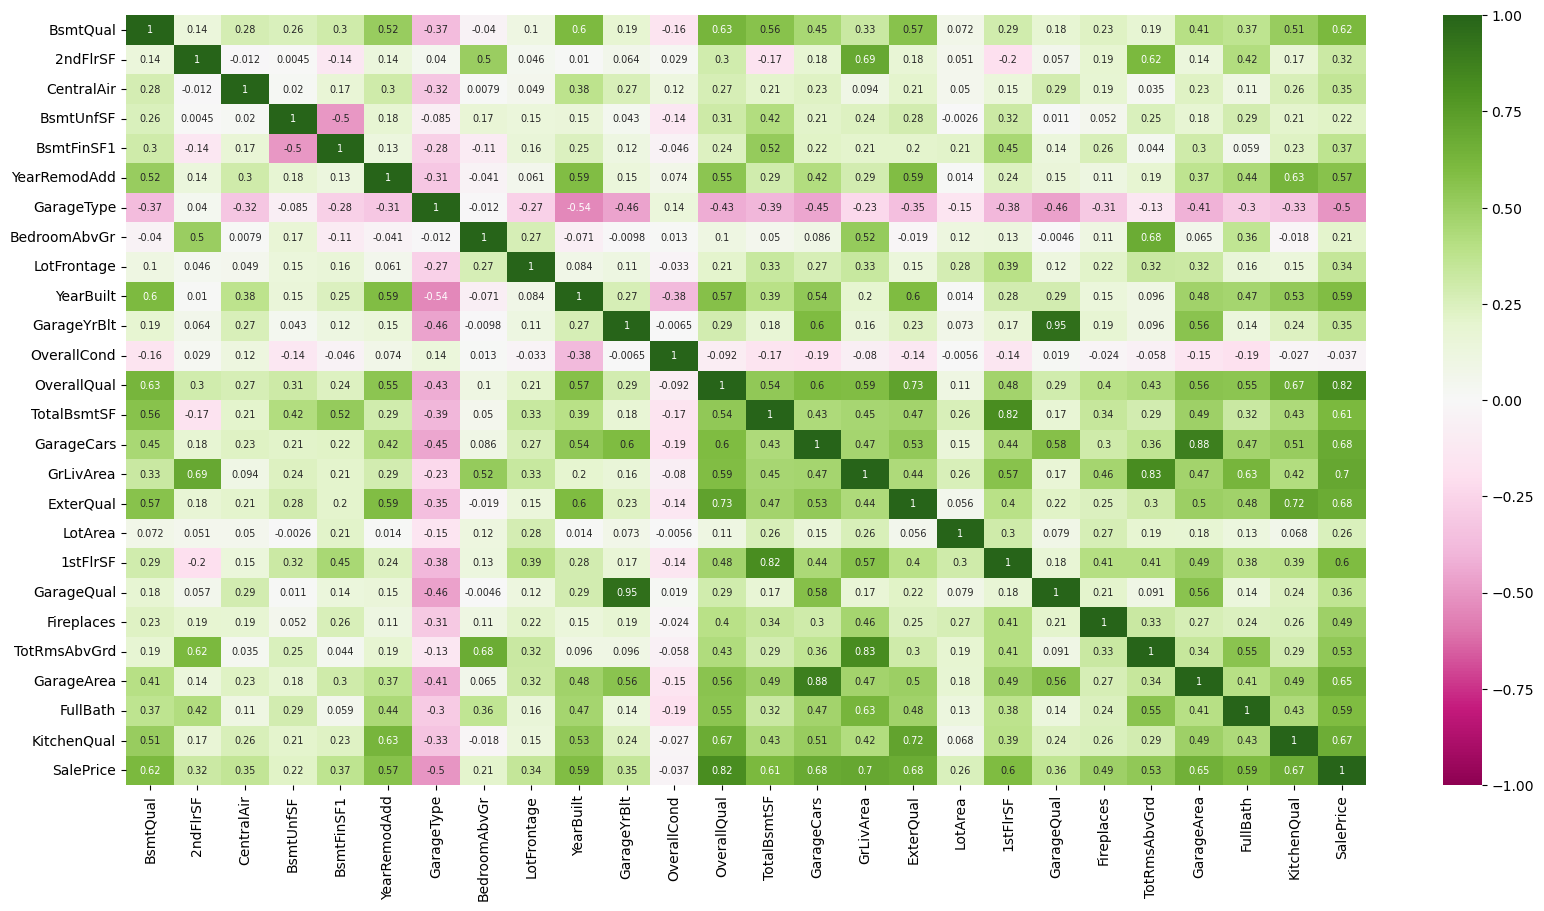

In [151]:
fig = plt.figure(figsize=(20,10))
df_plot = X_train[most_important_features].copy()
df_plot["SalePrice"] = y_train.copy()
sns.heatmap(df_plot.corr(),vmin=-1.0, vmax=1.0, cmap="PiYG", annot=True, annot_kws={"size":7})

In [156]:
X_train.var().sort_values(ascending=False)

LotArea         9.962565e+07
GrLivArea       2.761296e+05
MiscVal         2.461381e+05
BsmtFinSF1      2.080255e+05
GarageYrBlt     2.058412e+05
                    ...     
CentralAir      6.087628e-02
BsmtHalfBath    5.700283e-02
KitchenAbvGr    4.854892e-02
Street          4.095505e-03
Utilities       6.849315e-04
Length: 74, dtype: float64

In [164]:
remaining_number_features = list(set(X_train.columns).intersection(set(number_features)))
X_train[remaining_number_features].var().sort_values(ascending=False)

LotArea          9.962565e+07
GrLivArea        2.761296e+05
MiscVal          2.461381e+05
BsmtFinSF1       2.080255e+05
GarageYrBlt      2.058412e+05
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
2ndFlrSF         1.905571e+05
1stFlrSF         1.494501e+05
GarageArea       4.571251e+04
MasVnrArea       3.266383e+04
BsmtFinSF2       2.602391e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
ScreenPorch      3.108889e+03
LowQualFinSF     2.364204e+03
MSSubClass       1.789338e+03
PoolArea         1.614216e+03
YearBuilt        9.122154e+02
3SsnPorch        8.595059e+02
YearRemodAdd     4.262328e+02
MoSold           7.309595e+00
TotRmsAbvGrd     2.641903e+00
OverallQual      1.912679e+00
YrSold           1.763837e+00
OverallCond      1.238322e+00
BedroomAbvGr     6.654938e-01
GarageCars       5.584797e-01
Fireplaces       4.155947e-01
FullBath         3.035082e-01
BsmtFullBath     2.692682e-01
HalfBath         2.528937e-01
LotFrontag

In [165]:
remaining_categ_features = list(set(X_train.columns).intersection(set(categorical_features)))
X_train[remaining_categ_features]

,BsmtQual,CentralAir,RoofStyle,GarageType,PavedDrive,Neighborhood,Utilities,SaleCondition,BsmtCond,Exterior1st,...,LandSlope,HeatingQC,BsmtFinType2,MasVnrType,Condition1,ExterCond,KitchenQual,Foundation,Electrical,SaleType
0,4,1,1,1,3,5,0,4,3,12,...,0,5,6,1,2,3,4,2,5,8
1,4,1,1,1,3,24,0,4,3,8,...,0,5,6,2,1,3,3,1,5,8
2,4,1,1,1,3,5,0,4,3,12,...,0,5,6,1,2,3,4,2,5,8
3,3,1,1,5,3,6,0,0,4,13,...,0,4,6,2,2,3,4,0,5,8
4,4,1,1,1,3,15,0,4,3,12,...,0,5,6,1,2,3,4,2,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4,1,1,1,3,8,0,4,3,12,...,0,5,6,2,2,3,3,2,5,8
1456,4,1,1,1,3,14,0,4,3,9,...,0,3,5,3,2,3,3,1,5,8
1457,3,1,1,1,3,6,0,4,4,5,...,0,5,6,2,2,4,4,4,5,8
1458,3,1,3,1,3,12,0,4,3,8,...,0,4,5,2,2,3,4,1,4,8


In [166]:
from sklearn.feature_selection import SelectFromModel

In [172]:
selector_rf = SelectFromModel(rf, prefit=True)
# X_train_select = selector_rf.transform(X_train)

In [175]:
selector_rf.get_feature_names_out(X_train.columns)

array(['LotArea', 'OverallQual', 'YearRemodAdd', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea'],
      dtype=object)

In [176]:
selector_et = SelectFromModel(et, prefit=True)
selector_et.get_feature_names_out(X_train.columns)

array(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual',
       'BsmtQual', 'BsmtFinSF1', 'CentralAir', '1stFlrSF', 'GrLivArea',
       'FullBath', 'KitchenQual', 'Fireplaces', 'GarageType',
       'GarageCars'], dtype=object)

In [177]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_regression

In [180]:
# selector_chi2 = SelectKBest(chi2, k=10)
# selector_chi2.fit(X_train[remaining_categ_features], y_train)
# selector_chi2.get_feature_names_out(X_train[remaining_categ_features].columns)

ValueError: Unknown label type: (array([12.24769432, 12.10901093, 12.31716669, ..., 12.49312952,
       11.86446223, 11.90158345]),)

In [181]:
y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

# Model training

# Model selection

# Predicting values and giving recommendations